In [672]:
import pandas as pd
import random

In [673]:
L = []

for i in range(10000):
  a = random.randint(1, 6)
  b = random.randint(1, 6)

  L.append(a+b)


In [674]:
print(len(L))
L[:5]

10000


[7, 7, 9, 4, 7]

In [675]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
s

,count
2,0.0290
3,0.0558
4,0.0857
5,0.1131
6,0.1438
7,0.1663
8,0.1326
9,0.1093
10,0.0812
11,0.0557


In [676]:
import numpy as np
np.cumsum(s)

,count
2,0.0290
3,0.0848
4,0.1705
5,0.2836
6,0.4274
7,0.5937
8,0.7263
9,0.8356
10,0.9168
11,0.9725


### Bar plot

<Axes: >

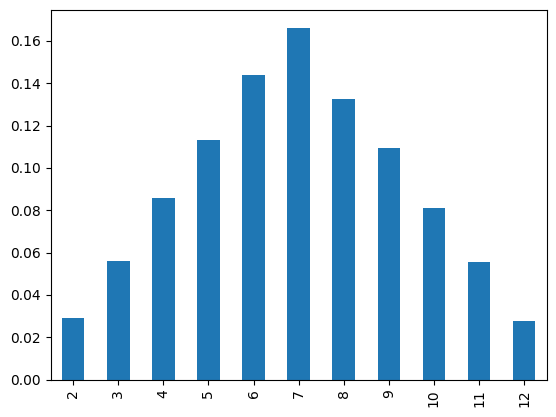

In [677]:
s.plot(kind='bar')

CDF for PMF

<Axes: >

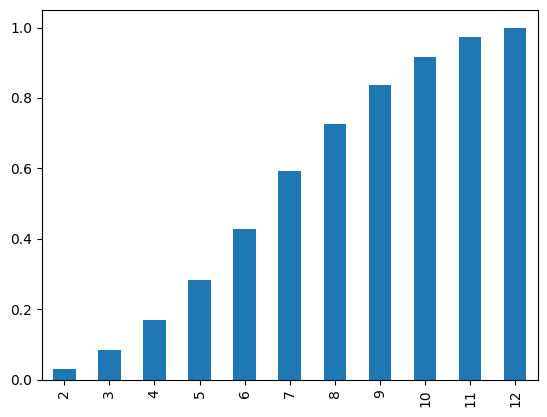

In [678]:
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [679]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [680]:
sample.mean()

np.float64(49.937696906760905)

(array([  8.,  38., 119., 228., 238., 234.,  86.,  33.,  13.,   3.]),
 array([35.67664369, 38.88296178, 42.08927987, 45.29559796, 48.50191605,
        51.70823414, 54.91455222, 58.12087031, 61.3271884 , 64.53350649,
        67.73982458]),
 <BarContainer object of 10 artists>)

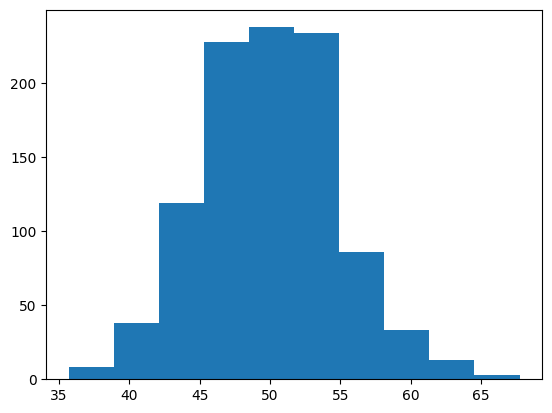

In [681]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [682]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

print("sample mean :", sample_mean)
print("sample std :", sample_std)

sample mean : 49.937696906760905
sample std : 4.842993078671922


In [683]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [684]:
values = np.linspace(sample.min(),sample.max(),100)
values

array([35.67664369, 36.0005142 , 36.32438471, 36.64825523, 36.97212574,
       37.29599626, 37.61986677, 37.94373728, 38.2676078 , 38.59147831,
       38.91534883, 39.23921934, 39.56308986, 39.88696037, 40.21083088,
       40.5347014 , 40.85857191, 41.18244243, 41.50631294, 41.83018345,
       42.15405397, 42.47792448, 42.801795  , 43.12566551, 43.44953602,
       43.77340654, 44.09727705, 44.42114757, 44.74501808, 45.0688886 ,
       45.39275911, 45.71662962, 46.04050014, 46.36437065, 46.68824117,
       47.01211168, 47.33598219, 47.65985271, 47.98372322, 48.30759374,
       48.63146425, 48.95533476, 49.27920528, 49.60307579, 49.92694631,
       50.25081682, 50.57468734, 50.89855785, 51.22242836, 51.54629888,
       51.87016939, 52.19403991, 52.51791042, 52.84178093, 53.16565145,
       53.48952196, 53.81339248, 54.13726299, 54.46113351, 54.78500402,
       55.10887453, 55.43274505, 55.75661556, 56.08048608, 56.40435659,
       56.7282271 , 57.05209762, 57.37596813, 57.69983865, 58.02

In [685]:
sample.max()

np.float64(67.73982458444564)

In [686]:
prob_densities = [dist.pdf(value) for value in values]

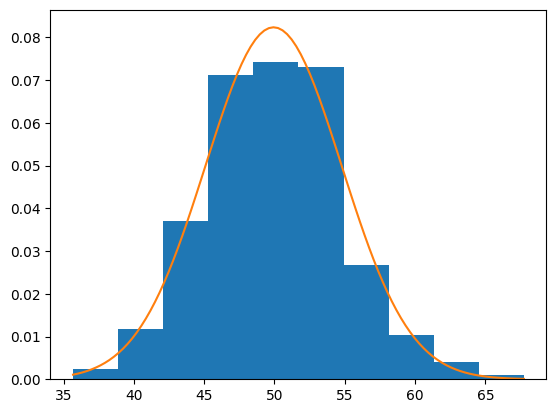

In [687]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,prob_densities)

/tmp/ipython-input-688-3735408510.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample, kde=True)


Text(0, 0.5, 'Density')

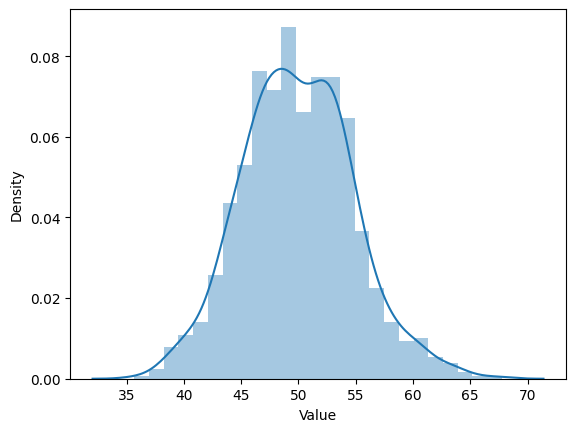

In [688]:
import seaborn as sns
sns.distplot(sample, kde=True)
plt.xlabel("Value")
plt.ylabel("Density")

### KDE

In [689]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [690]:
print(sample.size)
sample

1000


array([15.07541308, 14.80386254, 27.64005097, 15.60085727, 15.54420766,
       25.14643592, 19.34443933, 22.31934882, 23.95126598, 18.42966996,
       21.95846849, 26.61333371, 18.48916704, 21.63262295, 25.573869  ,
       28.43958048, 13.42895009, 16.34183571, 27.11859452, 18.98107553,
       18.86049355, 17.39422587, 19.6647312 , 15.92404991, 17.2718632 ,
       20.67811949, 24.74670531, 26.37232408, 21.10743951,  9.21660532,
       20.21370189, 15.3783204 , 24.74714367, 27.49673215, 12.09992986,
       24.19454132, 23.67863589, 22.28585194, 23.84423354, 14.91647873,
       16.98731447, 27.00781975, 26.57550577, 28.17115852, 16.75331243,
       18.3370618 , 23.29729739, 13.27165063,  8.64338886, 21.03623499,
       15.27855187,  7.12590437, 18.05810472, 28.24455172, 19.76564399,
       21.76947733,  9.47198434, 16.93310935, 19.12821804, 21.23278873,
       18.60453021, 10.79775531, 22.38082276, 17.58379934, 31.82478764,
       19.74813619, 28.09752744, 24.20813561, 24.49063147, 20.27

(array([ 3.,  1.,  4.,  3.,  7.,  3., 15.,  6., 17., 14., 19., 18., 32.,
        20., 21., 21., 15., 20., 15., 16.,  6.,  6., 12., 10., 11.,  8.,
        13., 17., 27., 31., 40., 37., 35., 48., 65., 56., 44., 50., 40.,
        41., 40., 26., 16., 19., 10.,  7.,  3.,  6.,  3.,  3.]),
 array([ 7.12590437,  8.06373743,  9.00157049,  9.93940355, 10.87723661,
        11.81506967, 12.75290273, 13.69073579, 14.62856885, 15.56640191,
        16.50423496, 17.44206802, 18.37990108, 19.31773414, 20.2555672 ,
        21.19340026, 22.13123332, 23.06906638, 24.00689944, 24.9447325 ,
        25.88256556, 26.82039862, 27.75823168, 28.69606474, 29.6338978 ,
        30.57173085, 31.50956391, 32.44739697, 33.38523003, 34.32306309,
        35.26089615, 36.19872921, 37.13656227, 38.07439533, 39.01222839,
        39.95006145, 40.88789451, 41.82572757, 42.76356063, 43.70139369,
        44.63922674, 45.5770598 , 46.51489286, 47.45272592, 48.39055898,
        49.32839204, 50.2662251 , 51.20405816, 52.14189122,

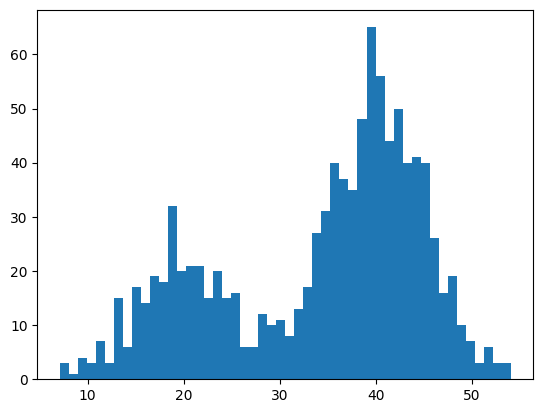

In [691]:
#plot histogram bins=50

plt.hist(sample, bins=50)

In [692]:
sample.shape

(1000,)

In [693]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

#convert data to a 2D array
sample = sample.reshape(len(sample), 1)
# sample.shape

model.fit(sample)

KernelDensity(bandwidth=5)

In [694]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [695]:
# probabilites are actually probability densities
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

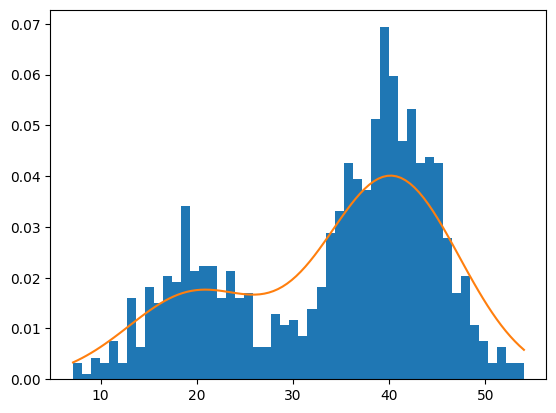

In [696]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

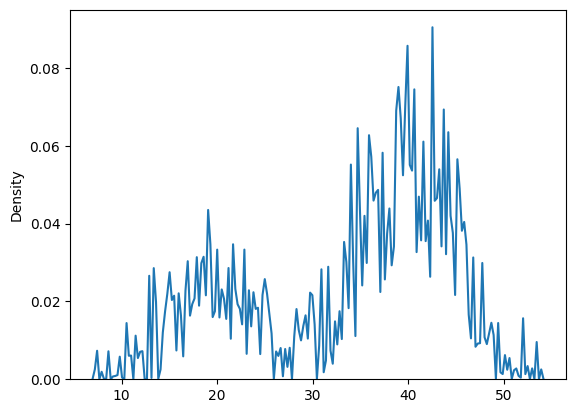

In [697]:
# when bandwith=0.2
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

<Axes: ylabel='Density'>

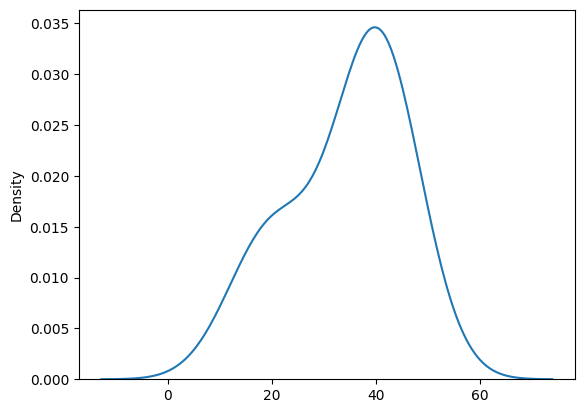

In [698]:
# when bandwith=2
sns.kdeplot(sample.reshape(1000),bw_adjust=2.5)

How to use PDF in DataScience

In [699]:
import seaborn as sns

In [700]:
df = sns.load_dataset('iris')

In [701]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [702]:
print(df.shape)

(150, 5)


In [703]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


<Axes: xlabel='sepal_length', ylabel='Density'>

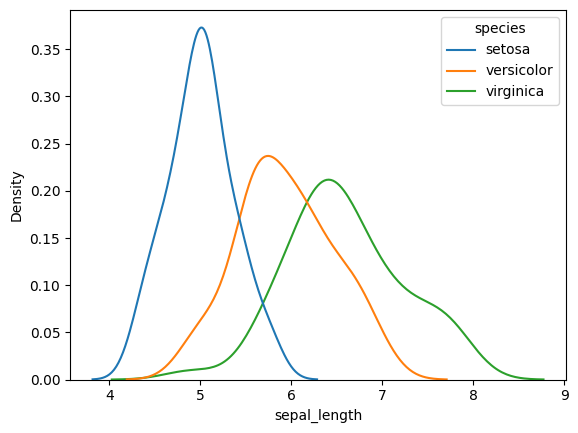

In [704]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

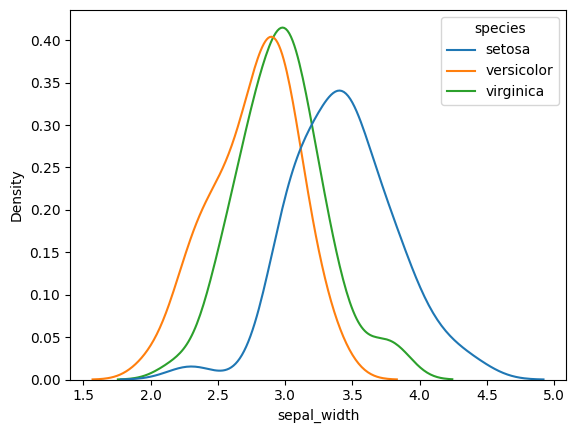

In [705]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

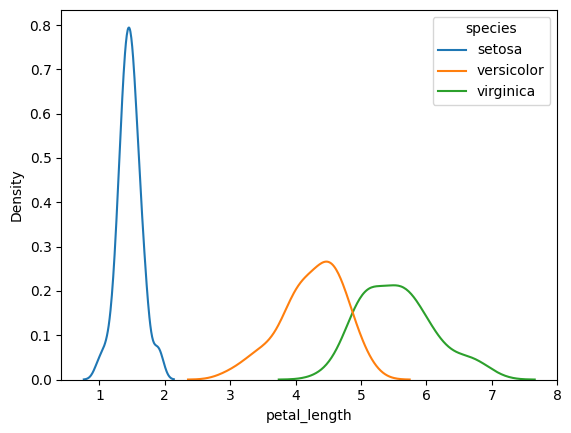

In [706]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

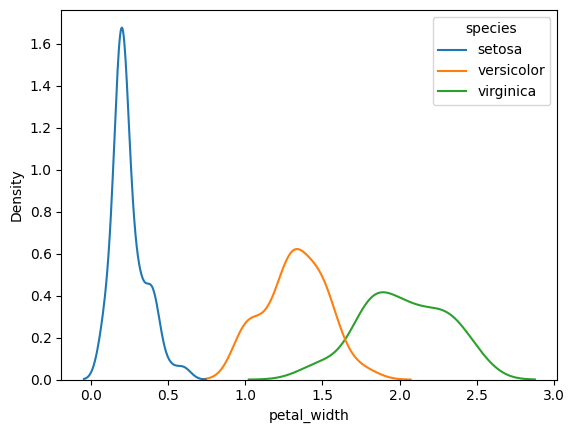

In [707]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

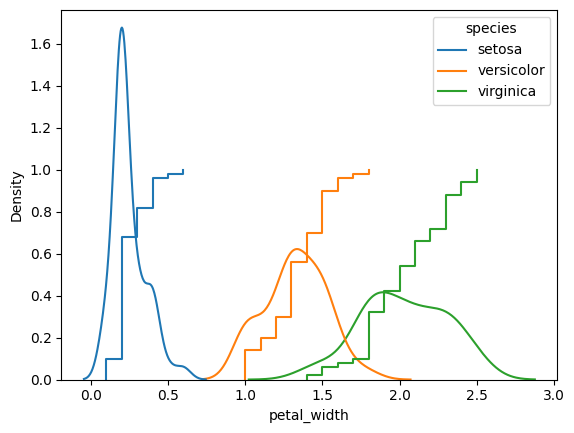

In [708]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

2D density plot

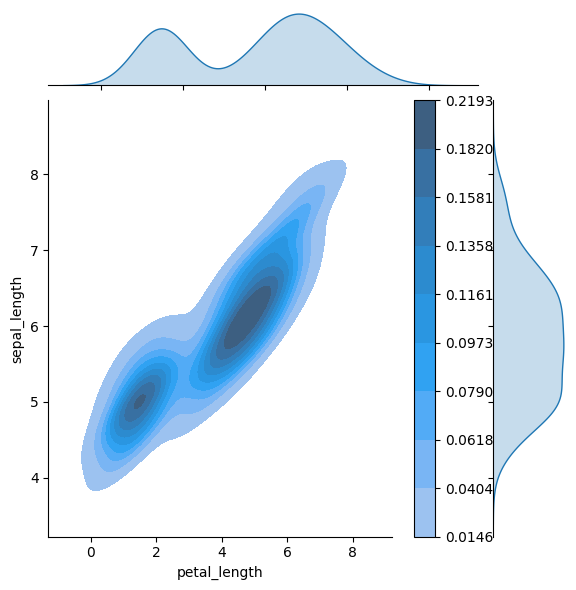

In [709]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

In [710]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [711]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [712]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

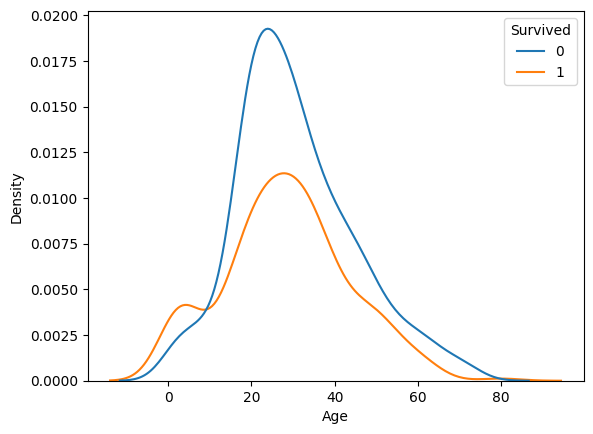

In [713]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

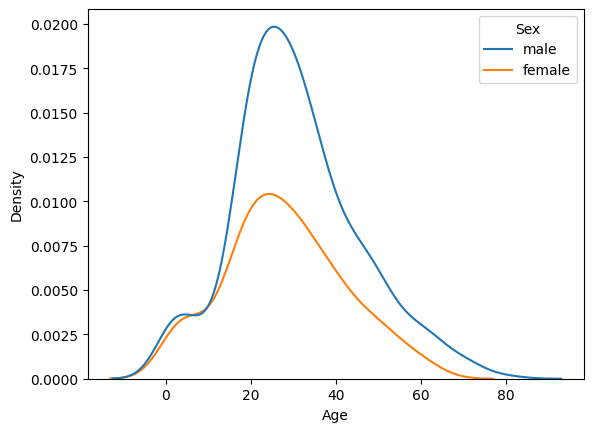

In [714]:
sns.kdeplot(data=titanic,x='Age',hue='Sex')

In [715]:
titanic['Age'].mean()

np.float64(29.69911764705882)

<Axes: xlabel='Age', ylabel='Density'>

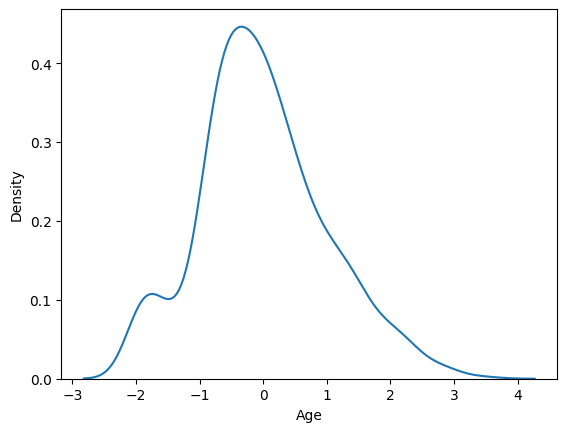

In [716]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()
sns.kdeplot(data=x)

In [717]:
x.mean()

np.float64(2.388378943731429e-16)

In [718]:
x.std()

0.9999999999999994

Calculate Skewness

In [719]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [720]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406095)

In [721]:
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.88037434994331)

In [722]:
titanic[titanic['Age'] > 73.27]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [723]:
titanic[titanic['Age'] < -13.88]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [724]:
titanic[(titanic['Age'] < -13.88) | (titanic['Age'] > 73.27)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [725]:
titanic['Age'].max()

80.0

In [726]:
titanic['Age'].min()

0.42